In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.geometry import Point

plt.style.use('seaborn-darkgrid')
%matplotlib inline

# Sierpinski's Triangle

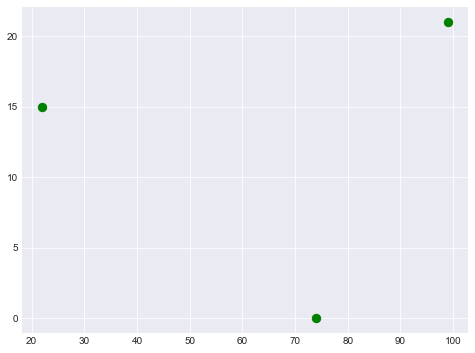

In [5]:
# generate random points
def scatterRandomPoints(n=3):
    x = np.random.randint(100, size = (2, n))
    plt.scatter(*x, c='g', s=70)
    return x, n
    
plt.figure(figsize=(8,6))
x, n = scatterRandomPoints()
plt.show()

## Randomize 

Randomize between the points, moving half way between each, following the algorithm

In [6]:
# define the n points (start with 3 points)
a = x[0][0], x[1][0]
b = x[0][1], x[1][1]
c = x[0][2], x[1][2]

# define sampling list
List = ['a','b','c']


# function to calculate midpoints 
def midpoint(a,b):
    return ((a[0] + b[0])/2, (a[1] + b[1])/2)



def sierpinski_triangle(a, b, c, iterations=10000):
    # empty list of new points
    new_points = []
    
    # set initial location
    current_location = a
    
    for i in range(iterations):
    
        # pick point at random and set as new location
        choice = np.random.choice(List)
        if (choice == 'a'): new_location = a
        if (choice == 'b'): new_location = b
        if (choice == 'c'): new_location = c

        # set new current location as midpoint & record
        current_location = midpoint(current_location, new_location)
        new_points.append(current_location)

    return new_points 

## Results

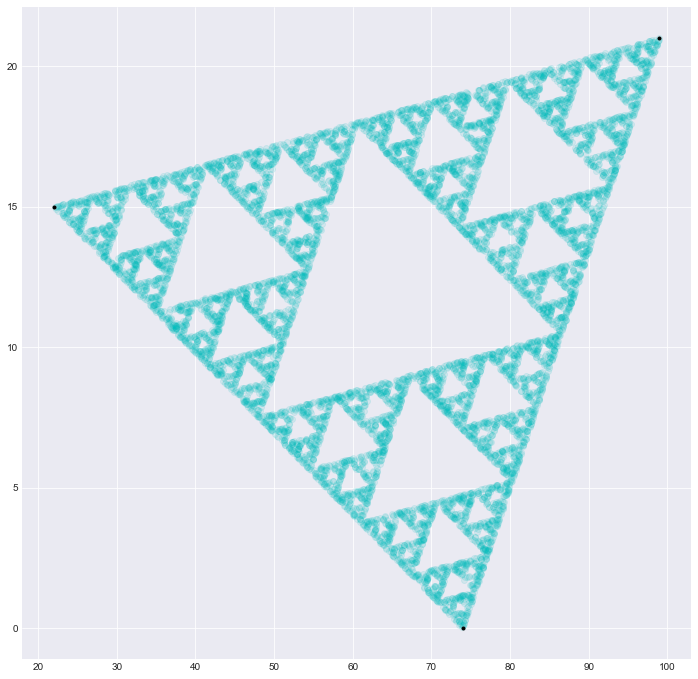

In [7]:
# call function
simulations = sierpinski_triangle(a,b,c)

# print results
plt.figure(figsize=(12,12))
plt.scatter(*zip(*simulations), c='c', alpha=0.1)
plt.scatter(*x, c='black', marker='.')
plt.show()  

# Algorithm supporting K nodes

can we write an algorithm that dynamically chances, allowing for any number of input points

In [8]:
# generate random points
def generate_random_points(n=3):

    x = np.random.randint(100, size = (2, n))
    return x, n

In [9]:
def midpoint(a,b):
    return ((a[0] + b[0])/2, (a[1] + b[1])/2)


def K_node_simulation(data, iterations=10000):
    """
    locate points by their access.
    
    Args:
        data: 2d array (points) 
        iterations: number of iternations to run
    """
    # get shape
    K = data.shape[1]
    
    # initialize starting point
    current_location = data[0][0], data[1][0]
    
    
    new_points = []
    for i in range(iterations):
    
        # pick point at random
        i = np.random.choice(range(K))
        
        # thus select corresponding new location
        new_location = data[0][i], data[1][i]

        # set new current location as midpoint & record
        current_location = midpoint(current_location, new_location)
        new_points.append(current_location)

    return new_points 

## run K node function

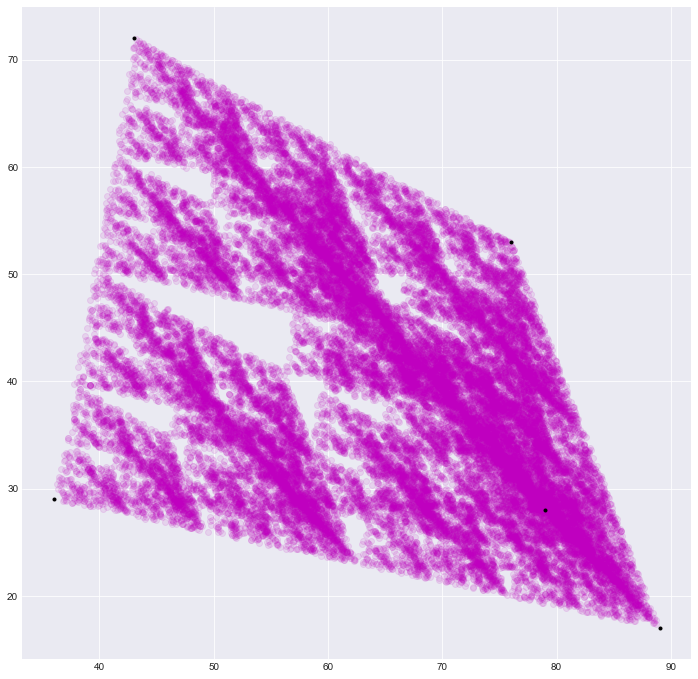

In [13]:
# select number of points
points = 5

# generate data
x,n = generate_random_points(points)

# run function 
points = K_node_simulation(x, iterations=50000)

# plot results
plt.figure(figsize=(12,12))
plt.scatter(*zip(*points), c='m', alpha=0.1)
plt.scatter(*x, c='black', marker='.')
plt.show() 

# Barnley's fern

may use the same code as above, however the initial points should be 6, correctly placed points

reference:
https://en.wikipedia.org/wiki/Barnsley_fern

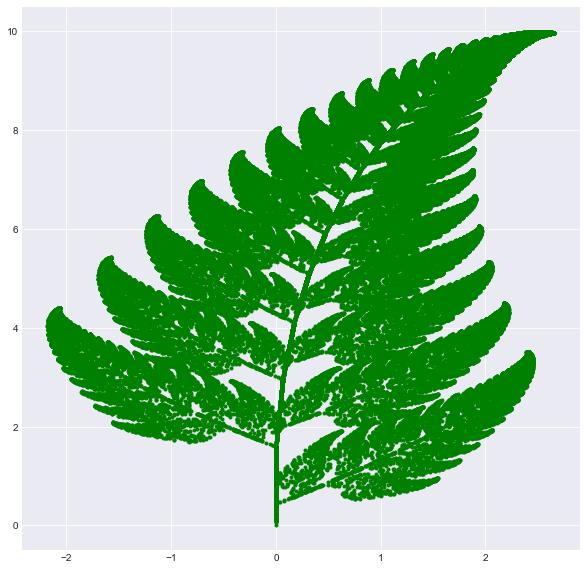

In [8]:
import random
import matplotlib.pyplot as plt

X = [0]
Y = [0]
for n in range(100000):
    r = random.uniform(0, 100)
    if r < 1.0:
        x = 0
        y = 0.16*Y[n-1]
    elif r < 86.0:
        x = 0.85*X[n-1] + 0.04*Y[n-1]
        y = -0.04*X[n-1] + 0.85*Y[n-1]+1.6
    elif r < 93.0:
        x = 0.2*X[n-1] - 0.26*Y[n-1]
        y = 0.23*X[n-1] + 0.22*Y[n-1] + 1.6
    else:
        x = -0.15*X[n-1] + 0.28*Y[n-1]
        y = 0.26*X[n-1] + 0.24*Y[n-1] + 0.44
    X.append(x);Y.append(y)

'''Make a plot'''
plt.figure(figsize = [10,10])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.show()